 **Music Genre Classification** é um dataset que possbilita gerar classificação a partir de características técnicas das músicas que podem definir seus gêneros. Essas características técnicas são representadas por dados numéricos, o que facilita a sua classificação ao utilizar determinados algoritmos, como aqueles que envolvem Redes Neurais, e até algoritmos mais "simples", como o Random Forest.

# Passos para a tarefa de classificação

1. **Exploração inicial dos dados**

    Será necessário uma análise inicial para verificar se o dataset não possui valores nulos ou se ele obedece os requisitos, assim como saber a natureza dos dados desse dataset. Os aspectos a serem analisados são:
      
      - **Quantos registros ele possui (>=100):**
      
      ✅ O dataset possui uma quantidade de registros muito mais ampla que o valor definido como mínimo.
      
      - **Quais são as colunas disponíveis:**
      
      ✅ O dataset possui cerca de 60 colunas disponíveis, a respeito de dados técnicos de áudios. Apenas duas colunas são não numéricas, o `filename` e `label`. `label` será utilizado como a coluna `target` para a tarefa de classificação. A coluna `lenght` traz apenas dados que se repetem constantemente no dataset, por isso foi considerado como um parâmetro irrelevante para o treinamento.
      
      - **Verificar se há valores nulos, duplicados ou anômalos:**
      
      ✅ Não há valores nulos, duplicados ou anômalos, após análise exploratória inicial dos dados.

  <br>

2. **Normalização dos dados**

    Como os atributos relevantes para a tarefa são numéricos e se encontram em diferentes escalas, a normalização será essencial para garantir que todos os atributos sejam comparáveis.
    Para isso, será utilizado inicialmente a técnica `Min-Max Scaling` para normalizar os valores entre 0 e 1.
    A dependender dos resultados obtidos (se satisfatórios ou não), pode ser tentado também normalizar utilizando `Standardization` para trazer os dados para uma média de 0 e desvio padrão de 1​.

  <br>
    
3. **Divisão dos dados**

    Separar os dados em conjunto de treino e teste. Será, inicialmente, feito com uma divisão de 70-30 ou 80-20, para garantir a avaliação do modelo depois de treiná-lo.

  <br>

4. **Escolha do algoritmo e Treinamento do Modelo**

    Para classificação de gêneros musicais, **redes neurais** são adequadas, já que são eficazes em extrair características complexas, como as presentes em áudios​.
    Outra opção que se adequa ao comportamento dos dados e pode trazer resultados bons rapidamente e que será testado, é o **Random Forest**​​.

    O treinamento será realizado e haverá uma avaliação do desempenho do modelo com métricas de classificação, como **acurácia, precisão, recall e F1-score​**.

  <br>

5. **Ajustes de Parâmetros ou Número de Camadas**

    A partir dos resultados das métricas obtidas, haverá uma tentativa de ajustar o modelo, através do tuning de hiperparâmetros.


# 1. Exploração Inicial dos Dados



In [ ]:
!pip install pandas
!pip install sklearn
!pip install imbalanced-learn scikit-optimize

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Dataset Menor (1MB)
url = "/content/drive/MyDrive/Datasets/features_30_sec.csv"
df_30sec = pd.read_csv(url)

print(f"Dataset Menor (1MB): \n{df_30sec.head()}\n")

# Dataset Maior (10MB)
url = "/content/drive/MyDrive/Datasets/features_3_sec.csv"
df_3sec = pd.read_csv(url)

print(f"Dataset Maior (10MB): \n{df_3sec.head()}")

Dataset Menor (1MB): 
          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1           

# 2. Normalização dos Dados

Foi tentado a normalização dos Dados utilizando os Scalers `MinMax` e `Standard`. No entanto, a diferença entre as duas técnicas foi mínima nos resultados de métricas de treinamento, portanto foi optado pelo uso tão somente do `MinMax`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Removendo dados não-numéricos e irrelevantes
numerical_columns = df_3sec.drop(['label', 'filename', 'length'], axis=1)

# Normalização MinMax
MinMaxScaler = MinMaxScaler()
df_scaled_MinMax = MinMaxScaler.fit_transform(numerical_columns)

# Normalização Standard
StandardScaler = StandardScaler()
df_scaled_Standard = StandardScaler.fit_transform(numerical_columns)

# 3. Divisão dos Dados

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo o dataset em conjuntos treino e teste 70-30
X_train_MinMax, X_test_MinMax, y_train_MinMax, y_test_MinMax = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.3, random_state=42)

# Dividindo o dataset em conjuntos treino e teste 80-20
X_train_MinMax2, X_test_MinMax2, y_train_MinMax2, y_test_MinMax2 = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.2, random_state=42)

# Dividindo o dataset em conjuntos treino e teste 90-10
X_train_MinMax3, X_test_MinMax3, y_train_MinMax3, y_test_MinMax3 = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.1, random_state=42)

# Dividindo o dataset em conjuntos treino e teste 95-05
X_train_MinMax4, X_test_MinMax4, y_train_MinMax4, y_test_MinMax4 = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.05, random_state=42)


print(f"Train 1 MinMax Shape: {X_train_MinMax.shape}")
print(f"Test 1 MinMax Shape: {X_test_MinMax.shape}")

print("\n----------############----------\n")

print(f"Train 2 MinMax Shape: {X_train_MinMax2.shape}")
print(f"Test 2 MinMax Shape: {X_test_MinMax2.shape}")

print("\n----------############----------\n")

print(f"Train 3 MinMax Shape: {X_train_MinMax3.shape}")
print(f"Test 3 MinMax Shape: {X_test_MinMax3.shape}")

print("\n----------############----------\n")

print(f"Train 4 MinMax Shape: {X_train_MinMax4.shape}")
print(f"Test 4 MinMax Shape: {X_test_MinMax4.shape}")

print("\n----------############----------\n")


Train 1 MinMax Shape: (6993, 57)
Test 1 MinMax Shape: (2997, 57)

----------############----------

Train 2 MinMax Shape: (7992, 57)
Test 2 MinMax Shape: (1998, 57)

----------############----------

Train 3 MinMax Shape: (8991, 57)
Test 3 MinMax Shape: (999, 57)

----------############----------

Train 4 MinMax Shape: (9490, 57)
Test 4 MinMax Shape: (500, 57)

----------############----------



# 4. Escolha do algoritmo e Treinamento do Modelo

### ❌ Redes Neurais Multicamadas (MLP - Multi-Layer Perceptron)

  > **Qual o motivo da escolha?**

  - Uma ótima opção para datasets com dados numéricos com muitas features, como é o caso.
  
  - Apesar de exigir um tempo maior para treinamento (a depender do número de camadas e neurônios), o MLP aproveita bem a natureza numérica dos dados e consegue capturar padrões complexos.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp_MinMax = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_MinMax.fit(X_train_MinMax, y_train_MinMax)

# Predições
mlp_predictions_MinMax = mlp_MinMax.predict(X_test_MinMax)

# Avaliação de métricas do modelo
print("Relatório de Classificação MLP MinMax:")
print(classification_report(y_test_MinMax, mlp_predictions_MinMax))
print("Matriz de Confusão MLP MinMax:")
print(confusion_matrix(y_test_MinMax, mlp_predictions_MinMax))

print("\n----------############----------\n")

Relatório de Classificação MLP MinMax:
              precision    recall  f1-score   support

       blues       0.81      0.77      0.79       319
   classical       0.93      0.92      0.92       308
     country       0.70      0.76      0.73       286
       disco       0.80      0.68      0.73       301
      hiphop       0.82      0.81      0.81       311
        jazz       0.78      0.90      0.84       286
       metal       0.84      0.90      0.87       303
         pop       0.77      0.90      0.83       267
      reggae       0.83      0.73      0.78       316
        rock       0.67      0.60      0.63       300

    accuracy                           0.80      2997
   macro avg       0.79      0.80      0.79      2997
weighted avg       0.80      0.80      0.79      2997

Matriz de Confusão MLP MinMax:
[[246   1  18   9   1  10  11   1   4  18]
 [  3 282   0   0   0  21   0   1   1   0]
 [ 15   0 217   4   1  18   0   8   5  18]
 [  4   1  12 204  14   4   9  18   9  26]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### ✔️ Random Forest

  > **Qual o motivo da escolha?**

  - Em conjuntos de dados com muitas variáveis, oferece interpretabilidade e permite visualizar a importância dos atributos, dando bons resultados rapidamente.

  - Pode ser mais lento para prever, podendo ser necessário ajustar o número de árvores.
  
  - É Excelente para uma análise inicial, pois permite identificar quais atributos são mais importantes para a classificação.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Training Model
rf_MinMax = RandomForestClassifier(n_estimators=100, random_state=42)
rf_MinMax.fit(X_train_MinMax, y_train_MinMax)

# Predições
rf_predictions_MinMax = rf_MinMax.predict(X_test_MinMax)

# Avaliação de métricas do modelo
print("Relatório de Classificação Random Forest MinMax:")
print(classification_report(y_test_MinMax, rf_predictions_MinMax))
print("Matriz de Confusão Random Forest MinMax:")
print(confusion_matrix(y_test_MinMax, rf_predictions_MinMax))

print("\n----------############----------\n")

Relatório de Classificação Random Forest MinMax:


NameError: name 'classification_report' is not defined



> Após primeira tentativa de treinamento com os algoritmos **MLP** e **Random Forest**, já foi percebida uma maior aderência ao conjunto de dados pelo Random Forest. Apesar de que redes neurais são ótimas para lidar com dados complexos (como os dados técnicos presentes nesse dataset), há também a parte negativa de ser um algoritmo que necessita de maior tempo de treinamento, configuração de hiperparâmetros, tratamento dos dados e capacidade computacional. Utilizando as técnicas desse notebook e com o dataset maior, o Random Forest já está ocasionando um gargalo de desempenho computacional com o ambiente do Google Colab. Caso os passos fossem repetidos com o MLP, haveria necessidade do uso do ambiente de execução `T4 GPU` do Google Colab, já que redes neurais se beneficiam do uso de GPUs, já que aumentam sua capacidade de processamento, necessário em decorrência da escolha de cada vez mais neurônios ou camadas para aumentar a taxa de aprendizado.

**Sendo assim, a partir desse ponto, foi decidido o enfoque em Random Forest, percebendo a sua plena capacidade de lidar com o dataset em questão.**



# 5. Ajustes de Hiperparâmetros

#### Importância dos Atributos do Random Forest

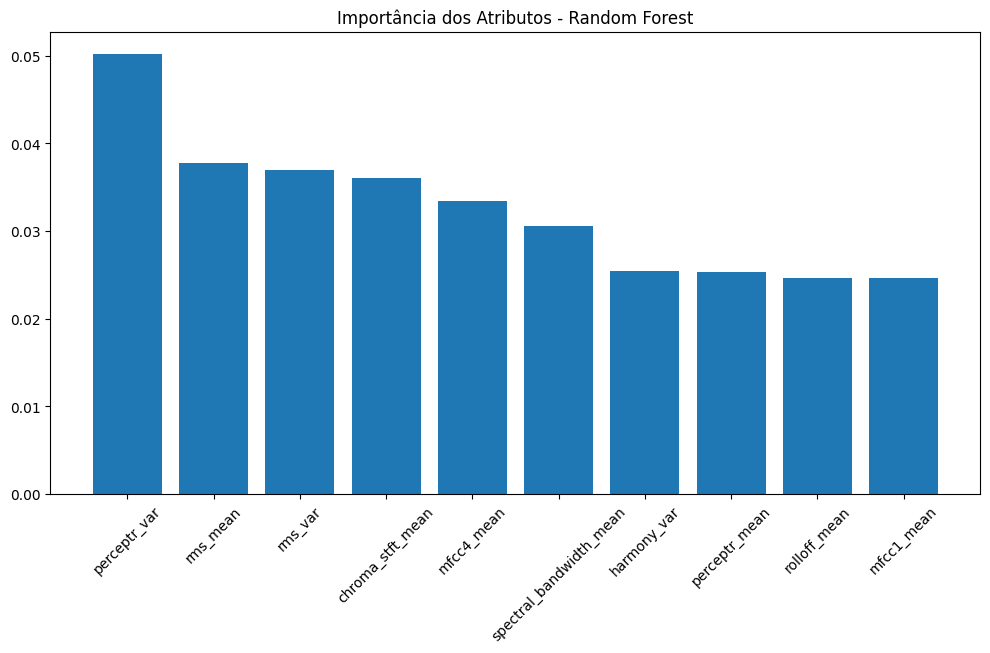

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotando importância dos atributos do Random Forest
feature_importances = rf_MinMax.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Visualização das top 10 features
plt.figure(figsize=(12, 6))
plt.title("Importância dos Atributos - Random Forest")
plt.bar(range(10), feature_importances[indices[:10]], align="center")
plt.xticks(range(10), [numerical_columns.columns[i] for i in indices[:10]], rotation=45)
plt.show()

## Tuning Random Forest

### Tuning Random Forest com Ajuste de Hiperparâmetros através do GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Aumentar o paralelismo na CPU e ajustar hiperparâmetros
rf_param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Definir o scoring com várias métricas
scoring = ['accuracy', 'f1', 'average_precision']

# Usar 'accuracy' como métrica principal para refit
rf_grid_search_accuracy = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1
)

rf_grid_search_MinMax = rf_grid_search_accuracy

# Treinar o modelo com o grid search
rf_grid_search_MinMax.fit(X_train_MinMax, y_train_MinMax)

# Avaliar a Random Forest com Normalização MinMax
rf_MinMax_best_model_accuracy = rf_grid_search_accuracy.best_estimator_
print(f"Melhor Modelo Random Forest Accuracy: {rf_MinMax_best_model_accuracy}")

print("\n----------############----------\n")

print("Relatório de Classificação do Random Forest Ajustado MinMax:")
rf_predictions_MinMax = rf_MinMax_best_model_accuracy.predict(X_test_MinMax)
print(classification_report(y_test_MinMax, rf_predictions_MinMax))

print("\n----------############----------\n")

print("Matriz de Confusão do Random Forest Ajustado MinMax:")
print(confusion_matrix(y_test_MinMax, rf_predictions_MinMax))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Resumo dos Resultados do Random Forest até aqui

Inicialmente, ao verificar a conformidade entre os dois datasets (em relação a normalização, número de parâmetros e natureza dos dados), foi decidido realizar o procedimento de ajustes de hiperparâmetros através do dataset menor (1MB), que possui bem menos registros, o que acelera o processo de computação, mas apresenta métricas de qualidade inferiores (afinal, quando mais dados, melhor). Logo, os resultads obtidos foram razoáveis de acordo com o tamanho do dataset, que é 10x menor que o dataset maior:

<br>

- **Acurácia**: Em torno de **66%** para a maioria dos modelos.

- **F1-score**: ponderado e não ponderado permanece próximo de **66%**.

- **Métricas por Classe**: Algumas classes, como `blues`, `classical`, `metal`, e `jazz`, têm consistentemente melhores resultados em todas as métricas. No entanto, classes como `rock`, `reggae`, e `disco` mostram desempenho inferior, com f1-scores variando entre **0.30** e **0.50**.

<br>

### Insights sobre o comportamento dos modelos

- **Convergência de Resultados:** Mesmo variando a métrica usada para o refit (acurácia, f1, average_precision, etc.), os resultados não variaram significativamente. Muito provavelmente, o modelo de Random Forest pode estar atingindo o seu limite para esse conjunto de dados e essa configuração de hiperparâmetros.

- **Desequilíbrio nas Classes:** O modelo está tendo dificuldade em separar as classes, talvez por similaridades nos dados ou um desequilíbrio entre as classes no conjunto de treinamento.

- **Hiperparâmetros e Estabilidade:** O uso de diferentes valores de hiperparâmetros no Random Forest parece não ter causado um impacto significativo nas métricas. A variação entre o número de `estimators`,  `max_depth` (**profundidade máxima**) e o número mínimo de amostras por leaf (`min_sample_leaf`) não ocasionou melhorias significativas.

<br>

### Últimos Ajustes

Os resultados sugerem que **o modelo Random Forest está atingindo o limite de performance para este conjunto de dados e suas características**. No entanto, mais alguns ajustes podem serem tentados para saber se de fato não há muita margem de melhoria das métricas do modelo.

<br>

#### 1. **Lidar com o Desequilíbrio de Classes**
   - Será utilizado a técnica **SMOTE** (Synthetic Minority Over-sampling Technique) para aumentar as instâncias de classes menos representadas.

<br>

#### 2. **Ajuste de Hiperparâmetros com Random Search ou BayesSearchCV**
   - Métodos que exploram de forma mais abrangente o espaço de busca em comparação ao GridSearch, que testa todas as combinações exaustivamente.
   - Será aumentado o número de folds no cross-validation para algo maior que 5 para proporcionar uma estimativa mais robusta da generalização do modelo.

<br>

#### 3. Testar outras proporções de divisão do conjunto de dados Test x Train
  - Outras proporções de divisão do conjunto de dados do dataset, em treino e teste, serão testadas, buscando a proporção que traga a melor acurácia geral, assim como outras métricas de qualidade relacionadas a tarefa de classificação.

  <br>

### Após Ajustes

  - Aproveitando todos os passos realizados até agora de ajustes no dataset menor até alcançar seu limite de performance, todo o processamento realizado será reproduzido novamente com o dataset maior, já que os dois representam a mesma coisa, variando apenas no volume de dados. Assim, as métricas de qualidade tendem a crescer de forma considerável, considerando que o volume para treinamento é maior e também já foram encontrados hiperparâmetros ideias para alcançar o limite de performance no conjunto de dados disponibilizado.

  - Dessa forma, até para maior clareza do notebook, todos os procedimentos realizados nesse notebook no dataset menor, serão substituídos para visualização direta do dataset maior, ao ser concluído o treinamento do modelo.

### 1. Lidando com o Desequilíbrio de Classes no Random Forest

#### ✔️ **Aplicação da Técnica SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para lidar com o desequilíbrio de classes
smote = SMOTE(random_state=42)

X_train_MinMax_resampled, y_train_MinMax_resampled = smote.fit_resample(X_train_MinMax, y_train_MinMax)

### 2. Tuning Random Forest com Ajuste de Hiperparâmetros através do RandomizedSearchCV e do BayesSearchCV

#### ✔️ **Ajuste de Hiperparâmetros com RandomSearch e BayesSearch** == *busca otimizada com a mesma entrega, em relação ao* ***GridSearchCV***

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Definindo os hiperparâmetros para Random Forest
param_dist = {
    'n_estimators': [400, 500, 600, 700, 800],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Definição RandomSearchCV com folds de 5 no CV
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                               param_distributions=param_dist,
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Definição BayesSearchCV (otimização bayesiana) com folds de 5 no CV
rf_bayes = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    search_spaces=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)

rf_random_MinMax, rf_bayes_MinMax = rf_random, rf_bayes
rf_random_MinMax2, rf_bayes_MinMax2 = rf_random, rf_bayes

#### ✔️ **CV de 5 folds** == *ótimo desempenho na generalização*




In [ ]:
# Treinando o modelo com RandomSearchCV e 5 folds no CV
rf_random_MinMax.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_random_MinMax_best = rf_random_MinMax.best_estimator_
rf_random_MinMax_predictions = rf_random_MinMax_best.predict(X_test_MinMax)
print(f"Melhores parâmetros encontrados pelo RandomSearchCV: {rf_random_MinMax.best_params_}")
print(classification_report(y_test_MinMax, rf_random_MinMax_predictions))

# Treinando o modelo com BayesSearchCV e 5 folds no CV
rf_bayes_MinMax.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_bayes_MinMax_best = rf_bayes_MinMax.best_estimator_
rf_bayes_MinMax_predictions = rf_bayes_MinMax_best.predict(X_test_MinMax)
print(f"Melhores parâmetros encontrados pelo BayesSearchCV: {rf_bayes_MinMax.best_params_}")
print(classification_report(y_test_MinMax, rf_bayes_MinMax_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros encontrados pelo RandomSearchCV: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.92      0.97      0.95       308
     country       0.79      0.84      0.81       286
       disco       0.87      0.87      0.87       301
      hiphop       0.93      0.91      0.92       311
        jazz       0.88      0.92      0.90       286
       metal       0.94      0.95      0.94       303
         pop       0.90      0.94      0.92       267
      reggae       0.92      0.89      0.90       316
        rock       0.88      0.78      0.82       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997

Melhores parâmetros e

#### ❌ **CV de 10 folds** == *muitos recursos computacionais para treinamento, mas sem justificativa nas métricas*

In [ ]:
# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=10)

rf_random_MinMax2.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_random_MinMax2_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax2_predictions = rf_random_MinMax2_best.predict(X_test_MinMax)
print(f"Melhores parâmetros encontrados pelo RandomSearchCV com CV > 5: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax, rf_random_MinMax2_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=10)

rf_bayes_MinMax2.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_bayes_MinMax2_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax2_predictions = rf_bayes_MinMax2_best.predict(X_test_MinMax)
print(f"Melhores parâmetros encontrados pelo BayesSearchCV com CV > 5: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax, rf_bayes_MinMax2_predictions))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores parâmetros encontrados pelo RandomSearchCV com CV > 5: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.92      0.97      0.95       308
     country       0.79      0.84      0.81       286
       disco       0.87      0.87      0.87       301
      hiphop       0.93      0.91      0.92       311
        jazz       0.88      0.92      0.90       286
       metal       0.94      0.95      0.94       303
         pop       0.90      0.94      0.92       267
      reggae       0.92      0.89      0.90       316
        rock       0.88      0.78      0.82       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores parâmetros encontrados pelo BayesSearchCV com CV > 5: OrderedDict([('bootstrap', False), ('max_depth', 50), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 800)])
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.92      0.97      0.94       308
     country       0.80      0.82      0.81       286
       disco       0.87      0.87      0.87       301
      hiphop       0.94      0.90      0.92       311
        jazz       0.87      0.92      0.89       286
       metal       0.94      0.95      0.94       303
         pop       0.91      0.95      0.93       267
      reggae       0.91      0.89      0.90       316
        rock       0.87      0.79      0.83       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



### 3. Testando outras proporções de divisão do conjunto de dados de Teste e Treino

- Outros samples de teste, criados a partir do mesmo conjunto de dados mas tendo como diferencial o volume separado para treino e teste, serão utilizados com as mesmas técnicas de tratamento praticados até aqui. A divisão original estabelece uma proporção **70-30** entre conjuntos teste e treino. As divisões a serem testadas são a **80-20**, **90-10** e por fim **95-05**, buscando a combinação que leve o modelo as melhores métricas no relatório de classificação.

#### **Divisão 80-20** == *boa generalização*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ------- Divisão 80-20 ------------
X_train_MinMax2_resampled, y_train_MinMax2_resampled = smote.fit_resample(X_train_MinMax2, y_train_MinMax2)

# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=5)

rf_random_MinMax2.fit(X_train_MinMax2_resampled, y_train_MinMax2_resampled)
rf_random_MinMax2_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax2_predictions = rf_random_MinMax2_best.predict(X_test_MinMax2)
print(f"Melhores parâmetros encontrados pelo RandomSearchCV com CV=5 e Divisão 80-20: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax2, rf_random_MinMax2_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=5)

rf_bayes_MinMax2.fit(X_train_MinMax2_resampled, y_train_MinMax2_resampled)
rf_bayes_MinMax2_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax2_predictions = rf_bayes_MinMax2_best.predict(X_test_MinMax2)
print(f"Melhores parâmetros encontrados pelo BayesSearchCV com CV=5 e Divisão 80-20: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax2, rf_bayes_MinMax2_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros encontrados pelo RandomSearchCV com CV=5 e Divisão 80-20: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.91      0.89      0.90       208
   classical       0.93      0.98      0.95       203
     country       0.81      0.84      0.83       186
       disco       0.91      0.87      0.89       199
      hiphop       0.94      0.91      0.93       218
        jazz       0.89      0.93      0.91       192
       metal       0.92      0.97      0.94       204
         pop       0.94      0.96      0.95       180
      reggae       0.91      0.91      0.91       211
        rock       0.90      0.80      0.85       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      19

#### ✔️ **Divisão 90-10** == *melhor generalização alcançada*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ------- Divisão 90-10 ------------
X_train_MinMax3_resampled, y_train_MinMax3_resampled = smote.fit_resample(X_train_MinMax3, y_train_MinMax3)

# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=5)

rf_random_MinMax2.fit(X_train_MinMax3_resampled, y_train_MinMax3_resampled)
rf_random_MinMax3_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax3_predictions = rf_random_MinMax3_best.predict(X_test_MinMax3)
print(f"Melhores parâmetros encontrados pelo RandomSearchCV com CV=5 e Divisão 90-10: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax3, rf_random_MinMax3_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=5)

rf_bayes_MinMax2.fit(X_train_MinMax3_resampled, y_train_MinMax3_resampled)
rf_bayes_MinMax3_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax3_predictions = rf_bayes_MinMax3_best.predict(X_test_MinMax3)
print(f"Melhores parâmetros encontrados pelo BayesSearchCV com CV=5 e Divisão 90-10: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax3, rf_bayes_MinMax3_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros encontrados pelo RandomSearchCV com CV=5 e Divisão 90-10: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.95      0.96      0.96       111
   classical       0.92      0.98      0.95       101
     country       0.84      0.89      0.86        93
       disco       0.90      0.87      0.89        98
      hiphop       0.97      0.91      0.94       106
        jazz       0.90      0.93      0.92       107
       metal       0.91      0.97      0.94        86
         pop       0.95      0.96      0.96        78
      reggae       0.94      0.91      0.92       108
        rock       0.89      0.81      0.85       111

    accuracy                           0.92       999
   macro avg       0.92      0.92      0.92       999
weighted avg       0.92      0.92      0.92       9

#### ❌ **Divisão 95-05** == *tendência de* ***overfitting***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ------- Divisão 95-05 ------------
X_train_MinMax4_resampled, y_train_MinMax4_resampled = smote.fit_resample(X_train_MinMax4, y_train_MinMax4)

# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=5)

rf_random_MinMax2.fit(X_train_MinMax4_resampled, y_train_MinMax4_resampled)
rf_random_MinMax4_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax4_predictions = rf_random_MinMax4_best.predict(X_test_MinMax4)
print(f"Melhores parâmetros encontrados pelo RandomSearchCV com CV=5 e Divisão 95-05: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax4, rf_random_MinMax4_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=5)

rf_bayes_MinMax2.fit(X_train_MinMax4_resampled, y_train_MinMax4_resampled)
rf_bayes_MinMax4_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax4_predictions = rf_bayes_MinMax4_best.predict(X_test_MinMax4)
print(f"Melhores parâmetros encontrados pelo BayesSearchCV com CV=5 e Divisão 95-05: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax4, rf_bayes_MinMax4_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros encontrados pelo RandomSearchCV com CV=5 e Divisão 95-05: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.95      0.95      0.95        56
   classical       0.88      0.96      0.92        51
     country       0.86      0.85      0.85        52
       disco       0.91      0.83      0.87        47
      hiphop       0.98      0.92      0.95        59
        jazz       0.87      0.90      0.89        52
       metal       0.88      0.95      0.92        40
         pop       0.95      0.97      0.96        37
      reggae       0.92      0.90      0.91        51
        rock       0.87      0.85      0.86        55

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       5

---

<br>


> # 🚀 **Modelo Escolhido**

  ```
  Melhores parâmetros encontrados pelo BayesSearchCV com CV=5 e Divisão 90-10:
    OrderedDict(
        [
          ('bootstrap', False), ('max_depth', 50),
          ('min_samples_leaf', 1), ('min_samples_split', 2),
          ('n_estimators', 800)
        ]
      )
      
              precision    recall  f1-score   support

       blues       0.95      0.96      0.96       111
   classical       0.92      0.98      0.95       101
     country       0.84      0.90      0.87        93
       disco       0.91      0.86      0.88        98
      hiphop       0.97      0.91      0.94       106
        jazz       0.90      0.93      0.92       107
       metal       0.91      0.97      0.94        86
         pop       0.95      0.97      0.96        78
      reggae       0.94      0.91      0.92       108
        rock       0.89      0.81      0.85       111

    accuracy                           0.92       999
   macro avg       0.92      0.92      0.92       999
weighted avg       0.92      0.92      0.92       999
  ```
  
  Após realizar diversas tentativas de treinamento e ajustes de hiperparâmetros, o modelo selecionado como **modelo final** é o **RandomForestClassifier**, otimizado utilizando a técnica de busca bayesiana (**BayesSearchCV**). Esse modelo apresentou os melhores resultados nas métricas de desempenho (**acurácia**, **precision**, **recall** e **f1-score**) sendo capaz de generalizar bem para diferentes classes do problema de classificação de gêneros musicais.

<br>

### Estrutura e Configuração do Modelo

- **Algoritmo Base**: RandomForestClassifier
- **Técnica de Normalização**: MinMax Scaler
- **Técnica de Otimização de Hiperparâmetros**: BayesSearchCV
- **Validação Cruzada (Cross-validation)**: 5 folds (subconjuntos)
- **Técnica de Balanceamento de Classes**: SMOTE (Synthetic Minority Over-sampling Technique)
- **Divisão do Conjunto de Dados**: 90% treino e 10% teste
- **Métricas de Avaliação**: acurácia, precision, recall, f1-score

<br>

### Técnica de Normalização

O modelo foi normalizado usando o **Min Max Scaler**. O impacto real do uso dessa normalização não foi estimado, tanto que ao testar com outra técnica, a **Standarlization**, os resultados obtidos foram similares.

<br>

### Hiperparâmetros Otimizados

Os hiperparâmetros selecionados automaticamente pelo **BayesSearchCV** foram:
- **bootstrap**: False
- **max_depth**: 50
- **min_samples_leaf**: 1
- **min_samples_split**: 2
- **n_estimators**: 800

<br>

### Cross-validation

O modelo foi avaliado utilizando a técnica de **cross-validation** com **5 folds**, que divide o conjunto de dados em cinco subconjuntos e avalia o modelo em cada um deles. Esse processo garante que o modelo seja validado em diferentes partes do dataset, minimizando o risco de overfitting e proporcionando uma avaliação mais robusta do desempenho do modelo em diferentes cenários.

<br>

### Uso do SMOTE para Balanceamento de Classes

O dataset original apresentava um desequilíbrio nas classes, o que poderia prejudicar o desempenho do modelo em prever corretamente gêneros musicais com menos exemplos. Como solução, foi aplicado o **SMOTE**, que gera exemplos sintéticos para as classes minoritárias. A aplicação do SMOTE resultou em uma melhora significativa nas métricas, especialmente para classes com menos exemplos, como **rock** e **disco**, no entanto, todas as classes foram beneficiadas.

<br>

### Comparação com outros modelos

Diversas configurações de modelos foram testadas ao longo do processo de desenvolvimento, variando entre o uso de **RandomSearchCV** e **BayesSearchCV** para a otimização de hiperparâmetros (**GridSearchCV** foi descartado, por sua gigantesca necessidade computacional para simular todas as combinações possíveis, sendo que os dois primeiros citados trouxeram resultados mais expressivos), além de diferentes proporções de divisão entre treino e teste, como 70-30, 80-20, 90-10, e 95-05.

- **Modelos com divisão 70-30** e **80-20** apresentaram uma performance inferior, especialmente em classes com menos dados, devido à menor quantidade de exemplos usados no treino.
- A divisão **95-05** resultou em uma tendência de overfitting, com o modelo aprendendo demais a partir do conjunto de treino e generalizando mal nos dados de teste.
- A divisão **90-10**, escolhida para o modelo final, mostrou-se ideal, proporcionando uma quantidade suficiente de dados para treino e um conjunto de teste robusto para validação.

<br>

### Métricas Finais

Os resultados finais obtidos a partir da avaliação no conjunto de teste foram:

- **Acurácia geral**: 92%
- **Precision média**: 92%
- **Recall médio**: 92%
- **F1-score médio**: 92%

Esses valores demonstram a capacidade do modelo de generalizar bem para o conjunto de dados. O modelo apresentou ótimos resultados em classes como **blues** (f1-score de 0.96), **classical** (f1-score de 0.95) e **pop** (f1-score de 0.96), mostrando-se eficaz tanto em classes majoritárias quanto em classes minoritárias, como **rock** (f1-score de 0.85) e **reggae** (f1-score de 0.92).
  